<a href="https://colab.research.google.com/github/tiasnyder/PHYS250/blob/main/SNYDER_Homework_3_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3: The Euler Method for Integrating ODEs

*Written by Rose Finn*

*Adapted from Giordano and Nakanishi, [Computational Physics](https://www.physics.purdue.edu/~hisao/book/), Chapter 1-2*

# Overview

The goal of this lab is to use the **Euler method** to model system that are changing with time.  If we can describe how the system changes with time, then we can determine how the system changes by stepping it forward in time using  tiny intervals of time.  This is the basic idea behind the Euler method.

# Directions
* Complete the problems below.  
* It is ok to discuss the problems with others, but you must write the code yourself.
* **Be sure to cite any references that you use!!!**


In [36]:
# import numpy and pyplot here
import numpy as np
from matplotlib import pyplot as plt

# Problem 1: 1D Projectile Motion with Euler Method

Let's try to apply the Euler to another physical problem, namely projectile motion.  We will start with a one-dimensional problem as a first step, and we will gradually make the calculations more complex by including air resistance.

We will first look at a problem where we drop a rock from a height of 30 m. Let the mass be 1 kg for simplicity.  To begin, we will use a time step of 0.2 seconds.

The Euler method is a bit more complex here than with radioactive decay, because we will need to keep track of both the position and velocity versus time.

```python
position[i] = position[i-1] + velocity[i-1]*dt
velocity[i] = velocity[i-1] + acceleration*dt
```

You should model your solution closely on the program we wrote to model the motion of a cyclist.    

In [53]:
# insert your function to calculate tmax that you wrote in Lecture on Animation
def calculate_tmax(y,y0,v0,a):
    """ function to calculate time to reach y """
    tplus = (-v0+np.sqrt(v0**2 - (2*a) * (y0-y)))/a
    tminus = (-v0-np.sqrt(v0**2 - (2*a) * (y0-y)))/a

    if tplus > 0:
      tmax =  tplus
    elif tminus > 0:
      tmax = tminus

    return tmax

In [54]:
# write a function to calculate the acceleration
# note: without air resistance, this should just return the acceleration of gravity
# but we will adapt this below to also handle air resistance

def acceleration(t):
  """ acceleration function for object moving with const accel"""
  g = -9.8
  # we will edit this below to include air resistance
  a = g
  return a

In [67]:
# write your initialize function to set up the position, velocity, and time arrays
# this should take in y0, v0y, tmax, and dt
# set up the t, pos, and vel arrays
# initialize the values for t=0 in the position and velocity arrays
# return t, pos, vel arrays

def initialize(y0,v0y,tmax,dt):
  t = np.arange(0,tmax,dt)
  pos = np.zeros_like(t)
  vel = np.zeros_like(t)

  pos[0] = y0
  vel[0] = v0y
  return t,pos,vel

In [68]:
# write your calculate function to compute the Euler solution for position and velocity
def calculate(t, pos, vel,dt):
  for i in range(1,len(t)):
    pos[i] = pos[i-1] + vel[i-1]*dt
    vel[i] = vel[i-1] + acceleration(t[i-1])*dt
    t[i] = t[i-1] + dt
  return t,pos,vel

In [69]:
# enter the parameters below
m = 1     # kg
g = -9.8   # m/s^2
y0 = 30   # m
y = 0    # m
v0y = 0   # m/s
dt = 0.2  # sec

In [75]:
# use your function to calculate tmax
tmax = calculate_tmax(y,y0,v0y,g)
dt = tmax/100
# call your initialize function
t,pos,vel = initialize(y0,v0y,tmax,dt)

# call your calculate function
tnoair,posnoair,velnoair = calculate(t,vel,pos,dt)

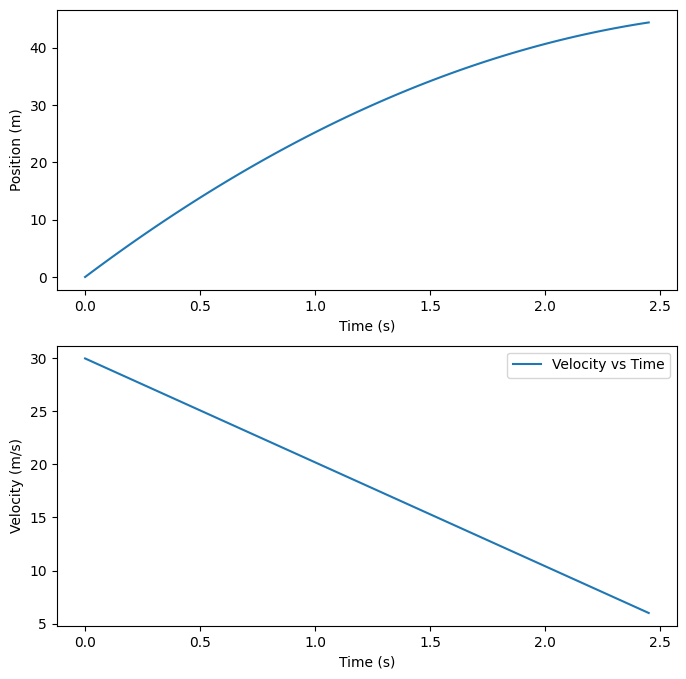

In [76]:
# plot position vs time and velocity vs time
# put these in one plot using plt.subplot(2,1,1) and plt.subplot(2,1,2)

plt.figure(figsize=(8,8))

# ignore!!! plotting incorrect position, see cell below
# plt.subplot(2,1,1)
# plt.plot(tnoair,posnoair,label="Position vs Time")
# plt.xlabel('Time (s)')
# plt.ylabel('Position (m)')

plt.subplot(2,1,2)
plt.plot(tnoair,velnoair,label="Velocity vs Time")
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')

plt.legend()

Text(0, 0.5, 'Position (m)')

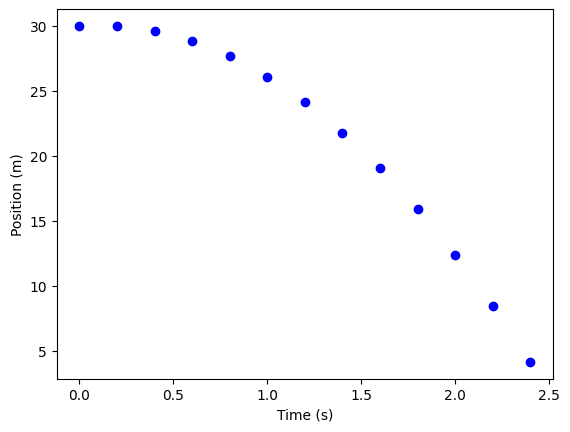

In [82]:
# calculate tmax
# tmax = calculate_tmax(y,y0,v0y,dt)

# call initialize
t,pos,vel = initialize(y0,v0y,tmax,dt)

# call calculate for no air resistance
tnoair,pnoair,vnoair = calculate(t,pos,vel,dt)


plt.plot(tnoair,pnoair,'bo')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

# Problem 2: 1D Projectile Motion with Air Resistance

Adapt your code to include the effects of air resistance.  As we did with the cyclist, we will assume that air resistance scales with the square of velocity.  

You can assume that the coefficient of the air resistance term is $B_2 = 0.2$, and if you have extra time, you can see how your results depend on the value you choose for $B_2$.

Again, plot your velocity vs time and position vs time.  Compare your results to those from Problem 1, and comment on any differences.

In [77]:
def accel_resist(g,m,vel):
  g = 9.8
  a = (B2/m)*vel**2 - g
  return a

In [78]:
def calculate_resist(t,pos,vel,dt,g,m):
  for i in range(1,len(t)):
    pos[i] = pos[i-1] + vel[i-1]*dt
    vel[i] = vel[i-1] + accel_resist(g,m,vel[i-1]) * dt
    t[i] = t[i-1] + dt
  return t,pos,vel

In [79]:
# enter the parameters below
m = 1     # kg
g = -9.8   # m/s^2
y0 = 30   # m
y = 0    # m
v0y = 0   # m/s
dt = 0.2  # sec
B2 = 0.2

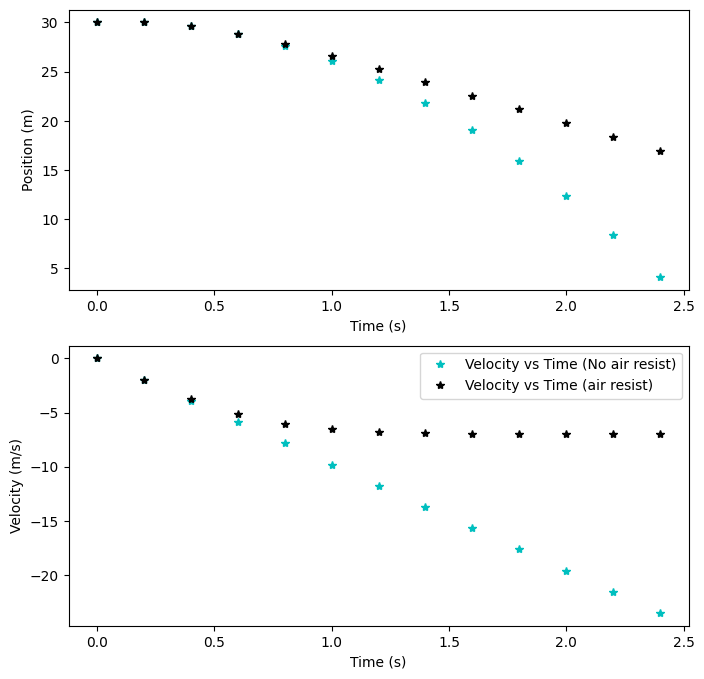

In [80]:
# calculate tmax
# tmax = calculate_tmax(y,y0,v0y,dt)

# call initialize
t,pos,vel = initialize(y0,v0y,tmax,dt)

# call calculate for no air resistance
tnoair,pnoair,vnoair = calculate(t,pos,vel,dt)

# calculate tmax
# tmax = calculate_tmax(y,y0,v0y,dt)

# call initialize
t,pos,vel = initialize(y0,v0y,tmax,dt)

# call calculate for no air resistance
tair,pair,vair = calculate_resist(t,pos,vel,dt,g,m)

plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.plot(tnoair,pnoair,'c*',label='Position vs Time (No air resist)')
plt.plot(tair,pair,'k*',label='Position vs Time (air resist)')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

plt.subplot(2,1,2)
plt.plot(tnoair,vnoair,'c*',label='Velocity vs Time (No air resist)')
plt.plot(tair,vair,'k*',label='Velocity vs Time (air resist)')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')

plt.legend()
